In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

from glob import iglob

In [3]:
# data = pd.read_csv('data/raw/LoanStats3d_securev1.csv',skiprows=[0], low_memory=False)
# data = get_all_data('data/raw/')
# data = data.drop('Unnamed: 0', axis=1)

### Get data for all years

In [2]:
import src.pipeline as pipeline

In [31]:
importlib.reload(pipeline)

<module 'src.pipeline' from '/Users/vinsonmccready/galvanize/loan-default-predictor/src/pipeline.py'>

In [3]:
data = pipeline.get_all_data('data/raw/')

In [4]:
data.shape

(2854472, 126)

### Exploration

In [5]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,145217616,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,145640422,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,145630143,NaN,12000,12000,12000.0,60 months,13.56%,276.49,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,145127870,NaN,15000,15000,14975.0,60 months,14.47%,352.69,C,C2,...,664.0,Oct-99,0.0,0.0,16.0,48.8,15.0,0.0,0.0,NaN
4,145558466,NaN,16000,16000,16000.0,60 months,17.97%,406.04,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103541,89885898,NaN,24000,24000,24000.0,60 months,12.79%,543.50,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103542,88977788,NaN,24000,24000,24000.0,60 months,10.49%,515.74,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103543,88985880,NaN,40000,40000,40000.0,60 months,10.49%,859.56,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103544,88224441,NaN,24000,24000,24000.0,60 months,14.49%,564.56,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = pipeline.clean_data(data)

In [73]:
data['total_acc'].isna()

0

In [13]:
data['purpose'].unique()

array(['credit_card', 'debt_consolidation', 'other', 'house',
       'small_business', 'moving', 'home_improvement', 'car', 'vacation',
       'medical', 'major_purchase', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673340 entries, 126 to 103532
Data columns (total 90 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          673340 non-null  int64  
 1   loan_amnt                   673340 non-null  int64  
 2   funded_amnt                 673340 non-null  int64  
 3   funded_amnt_inv             673340 non-null  float64
 4   term                        673340 non-null  object 
 5   int_rate                    673340 non-null  float64
 6   installment                 673340 non-null  float64
 7   grade                       673340 non-null  object 
 8   sub_grade                   673340 non-null  object 
 9   emp_title                   632353 non-null  object 
 10  emp_length                  638162 non-null  object 
 11  home_ownership              673340 non-null  object 
 12  annual_inc                  673340 non-null  float64
 13  verification

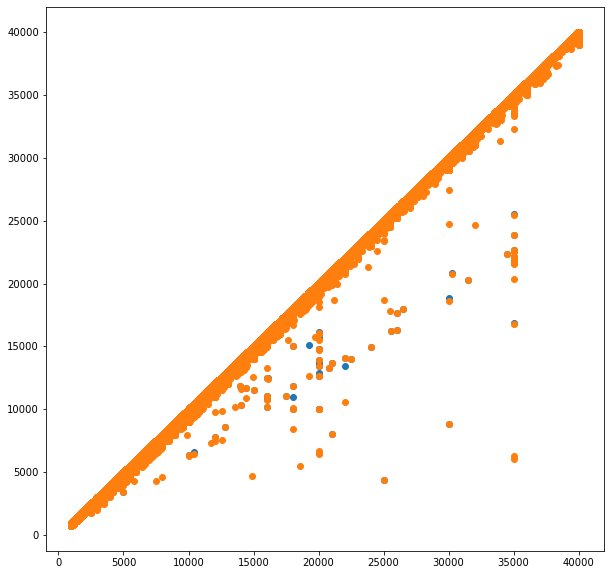

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(data.loan_amnt, data.funded_amnt)
ax.scatter(data.loan_amnt, data.funded_amnt_inv)


In [14]:
import pickle

In [ ]:
data['open_acc']

In [94]:
X_short = ['loan_amnt', 
            'term', 
            'int_rate', 
            'installment', 
            'sub_grade',
            'home_ownership', 
            'annual_inc',
            'purpose',
            'dti',
            'delinq_2yrs',
            'fico_range_low',
            'mo_sin_old_il_acct',
            'mo_sin_old_rev_tl_op',
            'mort_acc',
            'total_acc',
            'revol_bal',
           'open_acc',
           'pub_rec_bankruptcies',
           'pub_rec',
           'revol_util',
           'verification_status',
           'loan_status']

In [22]:
# Select useable columns:
             
X_columns = ['loan_amnt', 
             'term', 
             'int_rate', 
             'installment', 
             'purpose',
             'fico_range_low',
             'sub_grade',
             'emp_length',
             'home_ownership',
             'annual_inc',
             'dti',
             'delinq_2yrs',
             'earliest_cr_line',
             'inq_last_6mths',
             'mths_since_last_delinq',
             'mths_since_last_record',
             'open_acc',
             'pub_rec',
             'revol_bal',
             'revol_util',
             'total_acc',
             'collections_12_mths_ex_med',
             'mths_since_last_major_derog',
             'acc_now_delinq',
             'tot_coll_amt',
             'il_util',
             'open_rv_12m',
             'open_rv_24m',
             'max_bal_bc',
             'all_util',
             'total_rev_hi_lim',
             'inq_fi', 
             'total_cu_tl',
             'inq_last_12m',
             'acc_open_past_24mths',
             'avg_cur_bal',
             'bc_open_to_buy',
             'bc_util',
             'chargeoff_within_12_mths',
             'delinq_amnt',
             'mo_sin_old_il_acct',
             'mo_sin_old_rev_tl_op',
             'mo_sin_rcnt_rev_tl_op',
             'mo_sin_rcnt_tl',
             'mort_acc',
             'mths_since_recent_bc',
             'mths_since_recent_bc_dlq',
             'mths_since_recent_inq',
             'mths_since_recent_revol_delinq',
             'num_accts_ever_120_pd',
             'num_actv_bc_tl',
             'num_actv_rev_tl',
             'num_bc_sats',
             'num_bc_tl',
             'num_il_tl',
             'num_op_rev_tl',
             'num_rev_accts',
             'num_rev_tl_bal_gt_0',
             'num_sats',
             'num_tl_120dpd_2m', #may be leakage
             'num_tl_30dpd', #may be leakage
             'num_tl_90g_dpd_24m',
             'num_tl_op_past_12m',
             'pct_tl_nvr_dlq',
             'percent_bc_gt_75',
             'pub_rec_bankruptcies',
             'tax_liens',
             'tot_hi_cred_lim',
             'total_bal_ex_mort',
             'total_bc_limit',
             'total_il_high_credit_limit']

X_joint = ['application_type',
           'annual_inc_joint',
           'dti_joint',
           'verification_status_joint',
           'revol_bal_joint',
           'sec_app_fico_range_low',
           'sec_app_fico_range_low', 
           'sec_app_fico_range_high',
           'sec_app_earliest_cr_line',
           'sec_app_inq_last_6mths',
           'sec_app_mort_acc ',
           'sec_app_open_acc',
           'sec_app_revol_util',
           'sec_app_num_rev_accts',
           'sec_app_chargeoff_within_12_mths',
           'sec_app_collections_12_mths_ex_med',
           'sec_app_mths_since_last_major_derog']

target = ['loan_status']

# TODO: emp_title?
#       verification_status?
#       zip? addr_state?
#      fico?
#      last_credit_pull_d. <--- important to see if using old credit report
#.     application_type <--- may need to be split for ind vs joint

col_leak = ['funded_amnt_inv', 'int_rate', 'grade', 'sub_grade', 'issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv']


In [6]:
data['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [24]:
import importlib

In [20]:
importlib.reload(pipeline)

<module 'src.pipeline' from '/Users/vinsonmccready/galvanize/loan-default-predictor/src/pipeline.py'>

In [95]:
data_test = data[X_short]

In [96]:
data_test = data_test.dropna()

In [97]:
categorical = ['home_ownership','sub_grade', 'term', 'purpose', 'verification_status']
X = data_test.drop('loan_status', axis=1)
X = pd.get_dummies(X, columns=categorical, drop_first=True)  
# X = X.drop(['term' ], axis=1)


In [98]:
y = data_test['loan_status']
y = y.apply(lambda x: 1 if x=='Charged Off' else 0)

In [16]:
X, y = pipeline.create_Xy(data, X_columns)


In [39]:
X.reset_index(drop=True)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,4500,11.31,147.99,38500.0,4.64,0,675,180.0,69.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,30000,15.02,1040.26,90000.0,22.23,0,695,123.0,139.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2500,13.56,84.92,42000.0,15.09,0,710,177.0,177.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,2000,16.91,71.22,71000.0,30.39,3,705,195.0,135.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,20000,17.97,507.55,57000.0,22.18,0,735,78.0,284.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627048,5000,21.49,189.64,43000.0,1.40,1,670,100.0,26.0,0.0,...,0,0,0,0,1,0,0,0,0,0
627049,32000,13.99,744.42,125000.0,29.89,1,670,124.0,251.0,7.0,...,0,0,0,0,0,0,0,0,0,0
627050,40000,15.59,964.03,220000.0,10.88,0,715,104.0,151.0,4.0,...,0,0,0,0,0,0,0,0,0,0
627051,15000,10.49,487.47,60000.0,26.40,0,680,151.0,431.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
X.corr()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.953619,0.345633,0.005072,-0.001057,-0.012637,0.177183,-0.085854,0.320711,0.103939,...,-0.016904,-0.018744,0.088281,0.010610,-0.115487,0.000695,0.336008,0.274500,0.372825,0.193782
installment,0.953619,1.000000,0.337940,0.003184,0.008466,0.014222,0.164846,-0.074673,0.307739,0.122802,...,-0.011031,-0.001790,0.070840,0.030903,-0.107601,0.007448,0.303638,0.257681,0.339433,0.178060
annual_inc,0.345633,0.337940,1.000000,-0.214012,0.050319,0.037841,0.128922,-0.016369,0.302879,0.034547,...,0.013464,0.047321,-0.012821,-0.026831,-0.058894,0.036419,0.450089,0.344593,0.288024,0.286183
dti,0.005072,0.003184,-0.214012,1.000000,-0.021563,-0.015886,0.265191,-0.058435,0.120377,0.176007,...,-0.024279,0.091627,0.103723,0.167723,-0.048490,-0.028921,-0.026537,0.276951,0.014102,0.314852
delinq_2yrs,-0.001057,0.008466,0.050319,-0.021563,1.000000,0.020725,0.045240,-0.028068,-0.033322,-0.014663,...,0.625664,-0.038499,-0.452075,-0.014321,-0.059792,0.012951,0.061182,0.029338,-0.072023,0.060549
inq_last_6mths,-0.012637,0.014222,0.037841,-0.015886,0.020725,1.000000,0.110754,0.042233,-0.011457,-0.072223,...,0.017576,0.247759,-0.013158,-0.064085,0.050540,0.008710,0.023180,0.033065,-0.002996,0.039000
open_acc,0.177183,0.164846,0.128922,0.265191,0.045240,0.110754,1.000000,-0.032930,0.212090,-0.152348,...,0.008367,0.337165,0.110553,-0.103146,-0.037930,-0.007683,0.258073,0.385067,0.337449,0.346140
pub_rec,-0.085854,-0.074673,-0.016369,-0.058435,-0.028068,0.042233,-0.032930,1.000000,-0.107312,-0.087669,...,-0.011408,0.069093,-0.013374,-0.054833,0.666838,0.691746,-0.085294,-0.065670,-0.140192,-0.025347
revol_bal,0.320711,0.307739,0.302879,0.120377,-0.033322,-0.011457,0.212090,-0.107312,1.000000,0.221745,...,-0.035302,-0.029772,0.126341,0.115028,-0.130932,-0.014821,0.453626,0.519502,0.487145,0.106126
revol_util,0.103939,0.122802,0.034547,0.176007,-0.014663,-0.072223,-0.152348,-0.087669,0.221745,1.000000,...,-0.009498,-0.216691,-0.007969,0.713344,-0.104166,-0.015460,0.024067,0.118793,-0.172962,0.031464


## Modeling

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import recall_score, precision_score

In [11]:
# from src.model import create_model, get_scores

In [206]:
# import src.model as modeling

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [100]:
# importlib.reload(modeling)

In [101]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
recall = recall_score(y_test, rf_model.predict(X_test))
precision = precision_score(y_test, rf_model.predict(X_test))
print(f'Recall: {recall}\nPrecision: {precision}')

Recall: 0.07134901395531677
Precision: 0.5692629377940408


In [102]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
recall = recall_score(y_test, gb_model.predict(X_test))
precision = precision_score(y_test, gb_model.predict(X_test))
print(f'Recall: {recall}\nPrecision: {precision}')

Recall: 0.06007993186136408
Precision: 0.5899002894821486


In [244]:
y_hat = gb_model.predict(X_test)

In [85]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(left=0,right=1)
    ax.set_ylim(bottom=0,top=1)

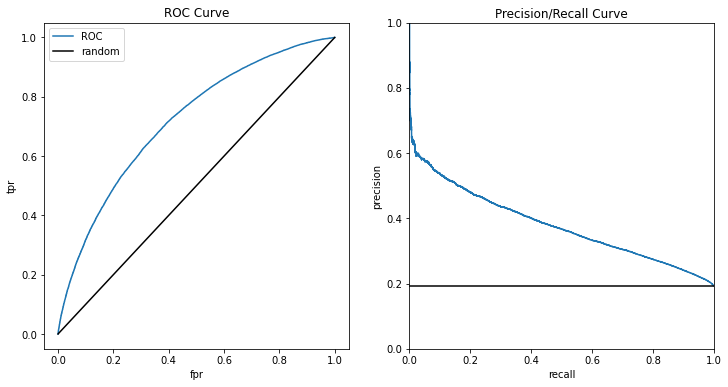

In [86]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
df = calculate_threshold_values(rf_model.predict_proba(X_test)[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

In [87]:
probabilities = rf_model.predict_proba(X_test)[:,1]

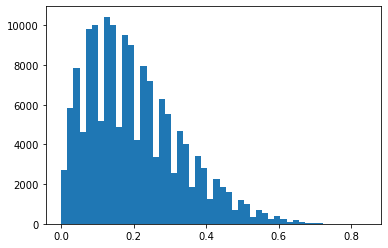

In [88]:
fig, ax = plt.subplots()
ax.hist(probabilities, bins=50);

In [89]:
(probabilities > .5).sum()

3946

In [90]:
y.sum()

121221

In [91]:
threshold = np.linspace(0,1,50)
yhat = rf_model.predict_proba(X_test)[:,1]

recall = []
precision = []
for t in threshold:
    c = pd.crosstab(pd.Categorical(y_test, categories=[0,1]), 
                    pd.Categorical(yhat>t, categories=[0,1]), 
                    rownames=['actual'], 
                    colnames=['predicted'],
                    dropna=False)
    r = c[1][1]/(c[1][1]+c[0][1])
    p = c[1][1]/(c[1][1]+c[1][0])
    recall.append(r)
    precision.append(p)


<ipython-input-91-6ed33272057a>:13: RuntimeWarning: invalid value encountered in long_scalars
  p = c[1][1]/(c[1][1]+c[1][0])


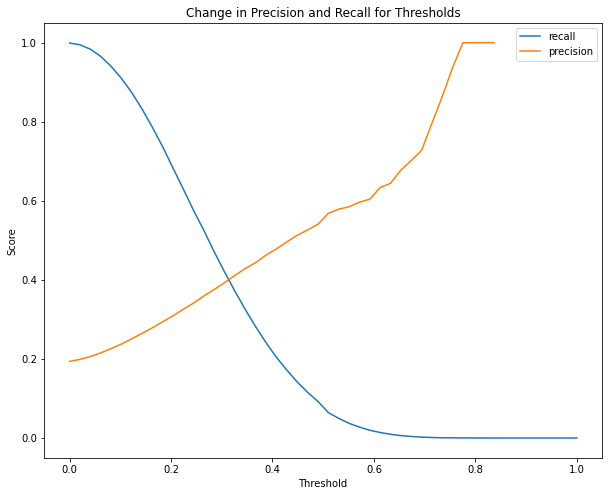

In [92]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(threshold, recall, label='recall')
ax.plot(threshold, precision, label='precision')
# ax.vlines([.08, .85], 0,1, linestyles='--', colors='green')
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.set_title('Change in Precision and Recall for Thresholds')
plt.show()

In [235]:
recall_score(y_test, probabilities>.61)

0.7348651191969887

In [231]:
threshold[30]

0.6122448979591836

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626656 entries, 126 to 103532
Data columns (total 69 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   626656 non-null  int64  
 1   int_rate                    626656 non-null  float64
 2   installment                 626656 non-null  float64
 3   annual_inc                  626656 non-null  float64
 4   dti                         626656 non-null  float64
 5   delinq_2yrs                 626656 non-null  int64  
 6   fico_range_low              626656 non-null  int64  
 7   mo_sin_old_il_acct          626656 non-null  float64
 8   mo_sin_old_rev_tl_op        626656 non-null  float64
 9   mort_acc                    626656 non-null  float64
 10  total_acc                   626656 non-null  int64  
 11  revol_bal                   626656 non-null  int64  
 12  open_acc                    626656 non-null  int64  
 13  pub_rec_bank